# I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# II. Importing and understanding our dataset

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Shape of dataset :

In [5]:
data.shape

(303, 14)

### Description of dataset :

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data["target"].unique()

array([1, 0])

In [9]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

### Checking for null values :

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking correlation between columns :

In [11]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### Creating dummy variables :

In [12]:
data=pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


# III. Feature Engineering :

### Using StandardScaler to scale the values :

In [13]:
from sklearn.preprocessing import StandardScaler
columnsToScale = ['age','trestbps','chol','thalach','oldpeak']
data[columnsToScale]=StandardScaler().fit_transform(data[columnsToScale])
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Separating the target column :

In [14]:
X=data.drop(columns='target',axis=1)
y=data['target']

In [15]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Splitting the dataset into train data and test data

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

# IV. Model fitting using different algorithms :

### Logistic Regression :

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_pred=model.predict(X_train)
train_acc=accuracy_score(train_pred,y_train)
test_pred=model.predict(X_test)
test_acc=accuracy_score(test_pred,y_test)
print("Logistic Regression - Training accuracy score : "+str(round(train_acc*100,2))+" %")
print("Logistic Regression - Test accuracy score : "+str(round(test_acc*100,2))+" %")
score_lr=round(test_acc*100,2)

Logistic Regression - Training accuracy score : 100.0 %
Logistic Regression - Test accuracy score : 78.69 %


### Naive Bayes :

In [75]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [76]:
train_pred=model.predict(X_train)
train_acc=accuracy_score(train_pred,y_train)
test_pred=model.predict(X_test)
test_acc=accuracy_score(test_pred,y_test)
print("Naive Bayes - Training accuracy score : "+str(round(train_acc*100,2))+" %")
print("Naive Bayes - Test accuracy score : "+str(round(test_acc*100,2))+" %")
score_nb=round(test_acc*100,2)

Naive Bayes - Training accuracy score : 77.27 %
Naive Bayes - Test accuracy score : 72.13 %


### SVM :

In [77]:
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [78]:
train_pred=model.predict(X_train)
train_acc=accuracy_score(train_pred,y_train)
test_pred=model.predict(X_test)
test_acc=accuracy_score(test_pred,y_test)
print("SVM - Training accuracy score : "+str(round(train_acc*100,2))+" %")
print("SVM - Test accuracy score : "+str(round(test_acc*100,2))+" %")
score_svm=round(test_acc*100,2)

SVM - Training accuracy score : 86.36 %
SVM - Test accuracy score : 81.97 %


### K Nearest Neighbors :

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [80]:
train_pred=model.predict(X_train)
train_acc=accuracy_score(train_pred,y_train)
test_pred=model.predict(X_test)
test_acc=accuracy_score(test_pred,y_test)
print("K Nearest Neighbours - Training accuracy score : "+str(round(train_acc*100,2))+" %")
print("K Nearest Neighbours - Test accuracy score : "+str(round(test_acc*100,2))+" %")
score_knn=round(test_acc*100,2)

K Nearest Neighbours - Training accuracy score : 88.43 %
K Nearest Neighbours - Test accuracy score : 80.33 %


### Decision tree :

In [81]:
from sklearn.tree import DecisionTreeClassifier
max_acc = 0
for i in range(200):
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_train,y_train)
    test_pred=model.predict(X_test)
    test_acc=accuracy_score(test_pred,y_test)
    if(test_acc>max_acc):
        max_acc = test_acc
        best_random_state = i

In [82]:
model = DecisionTreeClassifier(random_state=best_random_state)
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
train_acc=accuracy_score(train_pred,y_train)
test_pred=model.predict(X_test)
test_acc=accuracy_score(test_pred,y_test)
print("Decison Tree - Training accuracy score : "+str(round(train_acc*100,2))+" %")
print("Decision Tree - Test accuracy score : "+str(round(test_acc*100,2))+" %")
score_dt=round(test_acc*100,2)

Decison Tree - Training accuracy score : 100.0 %
Decision Tree - Test accuracy score : 78.69 %


### Random Forest Classifier :

In [83]:
from sklearn.ensemble import RandomForestClassifier
max_acc = 0
for i in range(300):
    model = RandomForestClassifier(random_state=i)
    model.fit(X_train,y_train)
    test_pred=model.predict(X_test)
    test_acc=accuracy_score(test_pred,y_test)
    if(test_acc>max_acc):
        max_acc = test_acc
        best_random_state = i

In [84]:
model = RandomForestClassifier(random_state=best_random_state)
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
train_acc=accuracy_score(train_pred,y_train)
test_pred=model.predict(X_test)
test_acc=accuracy_score(test_pred,y_test)
print("Random Forest Classifier - Training accuracy score : "+str(round(train_acc*100,2))+" %")
print("Random Forest Classifier - Test accuracy score : "+str(round(test_acc*100,2))+" %")
score_rf=round(test_acc*100,2)

Random Forest Classifier - Training accuracy score : 100.0 %
Random Forest Classifier - Test accuracy score : 85.25 %


### XGB Boost :

In [85]:
import xgboost as xgb
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_pred=model.predict(X_train)
train_acc=accuracy_score(train_pred,y_train)
test_pred=model.predict(X_test)
test_acc=accuracy_score(test_pred,y_test)
print("XGBoost - Training accuracy score : "+str(round(train_acc*100,2))+" %")
print("XGBoost - Test accuracy score : "+str(round(test_acc*100,2))+" %")
score_xgb=round(test_acc*100,2)

XGBoost - Training accuracy score : 100.0 %
XGBoost - Test accuracy score : 78.69 %


# VI. All scores together

<AxesSubplot: xlabel='Algorithms :', ylabel='Accuracy score :'>

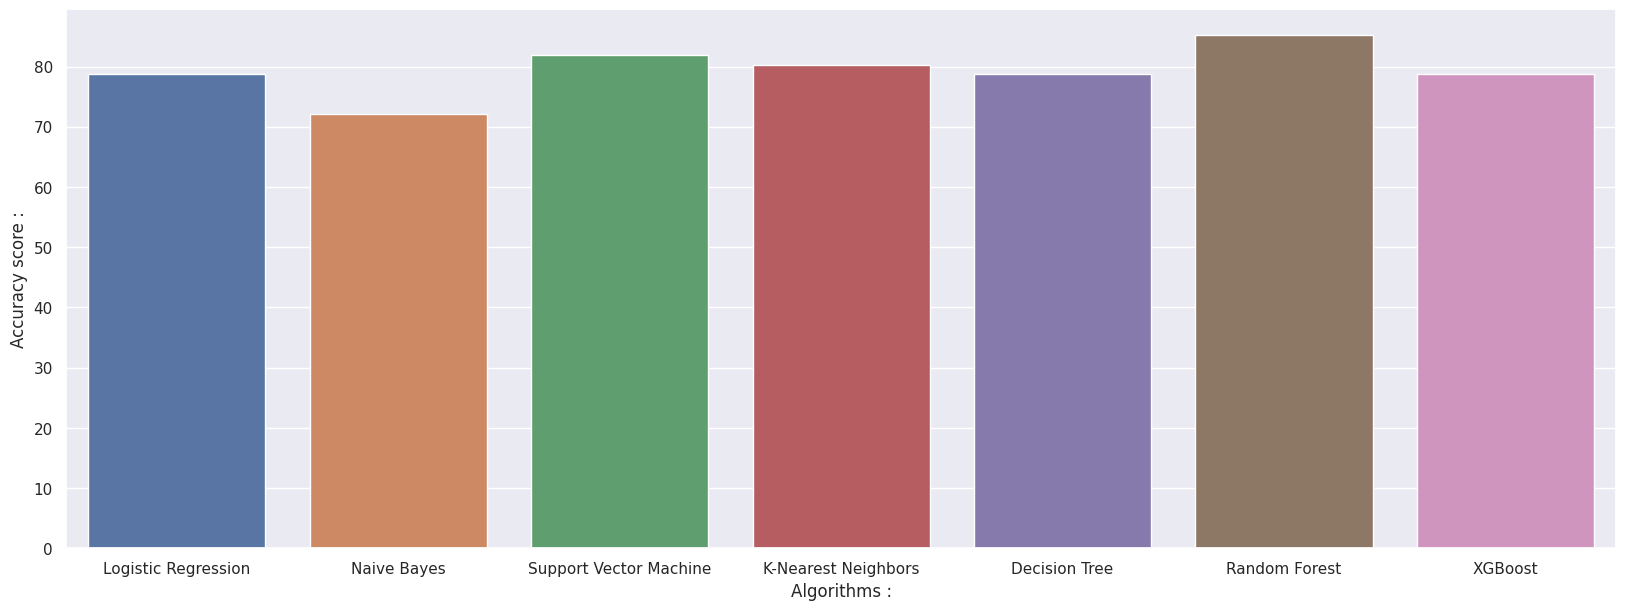

In [94]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]
sns.set(rc={'figure.figsize':(20,7)})
plt.xlabel("Algorithms :")
plt.ylabel("Accuracy score :")
sns.barplot(x=algorithms,y=scores)